<div class="frontmatter text-center">
<h1> DNDS 6003: Data and Network Visualization</h1>
<h2>Lecture 04: Distributions: Histograms, binning, violin plots</h2>
<h3>Central European University</h3>
    <h3>Instructor: Tiago Peixoto</h3>
</div>


In our classes we will use three popular Python modules, Numpy, Matplotlib, and Pandas. These are powerful modules to load, handle and plot data. You do not need to know every single bit of these modules for this course, but you need to have some familiarity.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd
%matplotlib inline

# PRO-tip: Let's use the SVG backend to render figures in the notebook. It looks much better.

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
mu = 100.0
sigma1 = 15.0
A1 = np.random.normal(mu, sigma1, 10000) # Let's generate fake data.
print(A1)

[129.66614681  74.48426378 100.59822855 ... 101.62215798  76.39807989
  75.61886217]


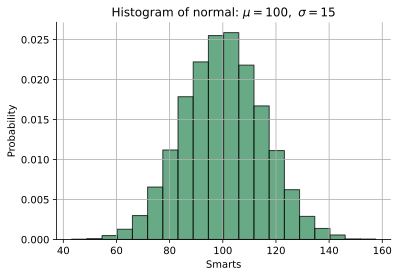

In [3]:
fig, ax = plt.subplots(1, 1)

# the histogram of the data
n, bins, patches = plt.hist(A1, 20, density=True, facecolor='#368d5c', alpha=0.75, edgecolor='k')

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of normal: $\mu=100,\ \sigma=15$')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

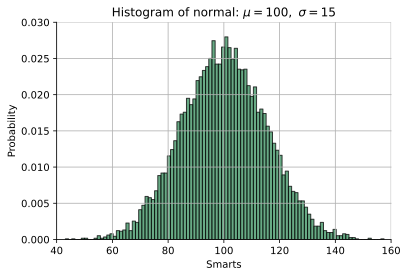

In [4]:
fig, ax = plt.subplots(1, 1)

# the histogram of the data
n, bins, patches = plt.hist(A1, int(np.sqrt(len(A1))), density=True, facecolor='#368d5c', alpha=0.75, edgecolor='k')

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of normal: $\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

*** 
### Quick Exercise
What does the option density=True do? Try to understand by removing it and plotting again.
***


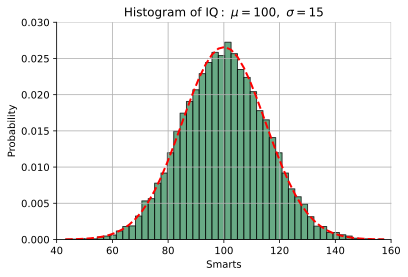

In [5]:
fig, ax= plt.subplots(1, 1)

# the histogram of the data
n, bins, patches = plt.hist(A1, 50, density=True, facecolor='#368d5c', alpha=0.75, edgecolor='k')

# add a 'best fit' line
y = scipy.stats.norm.pdf( bins, mu, sigma1)
l = plt.plot(bins, y, 'r--', linewidth=2)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

## Density plot

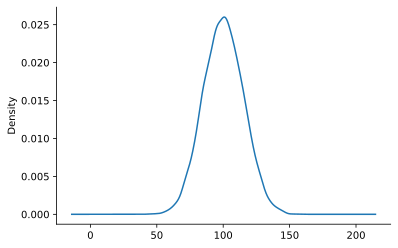

In [6]:
df = pd.DataFrame(A1)
ax = df.plot(kind='density')
ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.legend().set_visible(False)

## Comparing distributions

In [7]:
mu = 100.0
sigma1 = 15.0
sigma2 = 25.0
A1 = np.random.normal(mu, sigma1, 10000) # IQ measurements of humans
A2 = np.random.normal(mu, sigma2, 10000) # IQ measurements of aliens

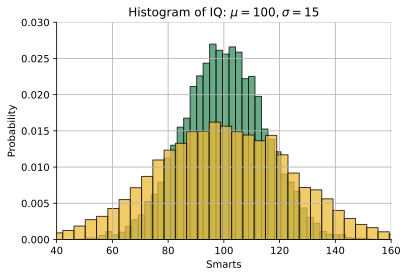

In [8]:
fig, ax = plt.subplots(1, 1)

# the histogram of the data
n, bins, patches = plt.hist(A1, 50, density=True, facecolor='#368d5c', alpha=0.75, edgecolor='k')
n, bins, patches = plt.hist(A2, 50, density=True, facecolor='#efbb38', alpha=0.75, edgecolor='k')

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of IQ: $\mu=100, \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

__Not ideal to compare two distributions! Even less if have three, four or even more samples!__

## Boxplots

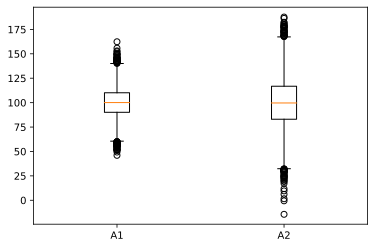

In [9]:
fig, ax = plt.subplots(1, 1)
ax.boxplot([A1, A2]);
plt.setp(ax, xticklabels=['A1', 'A2']);

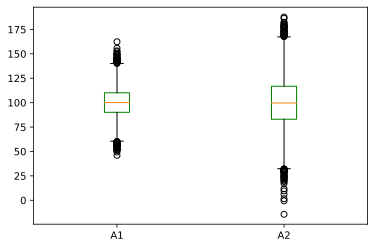

In [10]:
fig, ax = plt.subplots(1, 1)
bp = ax.boxplot([A1, A2]);
plt.setp(ax, xticklabels=['A1', 'A2'])
plt.setp(bp['boxes'], color='green')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], marker='o');

In [11]:
mu = 100.0
sigma1 = 15.0
sigma2 = 25.0
A1 = np.random.normal(mu, sigma1, 10000) # IQ measurements of humans
A2 = np.concatenate((np.random.normal(mu-50, sigma1, 10000),
                     np.random.normal(mu+50, sigma2, 10000)), axis=0) # IQ measurements of aliens

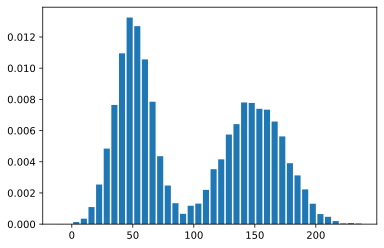

In [12]:
fig, ax = plt.subplots(1, 1)
ax.hist(A2, 40, density=True, histtype='bar', rwidth=0.8);

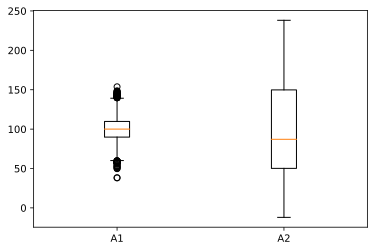

In [13]:
fig, ax= plt.subplots(1, 1)
ax.boxplot([A1, A2])
plt.setp(ax, xticklabels=['A1', 'A2']);

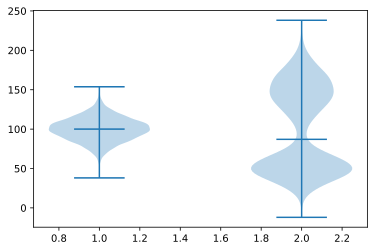

In [14]:
fig, ax = plt.subplots(1, 1)
ax.violinplot([A1, A2], showmeans=False, showmedians=True);

# Exercise (and a bit of data munging)
Use the file stockholm_temperatures.dat:

In [15]:
!head stockholm_temperatures.dat #don't execute this if you use windows!

'head' is not recognized as an internal or external command,
operable program or batch file.


In [16]:
!tail stockholm_temperatures.dat #don't execute this if you use windows!

'tail' is not recognized as an internal or external command,
operable program or batch file.


In [17]:
data_sweden = np.loadtxt('stockholm_temperatures.dat')

In [18]:
np.mean(data_sweden[:,3]) #this is the average temperature over 2 centuries 

6.197109684751585

In [19]:
np.std(data_sweden[:,3]) # and this is the standard deviation

8.282271621340573

We can also select part of the data we are interested in:

In [20]:
mymask = (data_sweden[:,1] == 10) #I am creating a mask which takes only the data of october
np.mean(data_sweden[mymask,3])

6.760057821059039

In [21]:
mymask = (data_sweden[:,1] == 6) #June
np.mean(data_sweden[mymask,3])

14.659591194968554

### Smoothing
Another useful tool when using time series are so called "smoothing techniques". When there are too many fluctuations in our data, we could see something like this: 

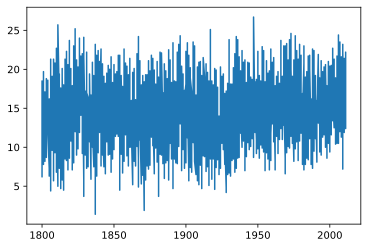

In [22]:
plt.plot(data_sweden[mymask,0],data_sweden[mymask,3])

What we can do is using a moving average (called rolling mean in pandas) to smooth data. This is like moving a window of a certain size over the data, and take the average of the values falling in that window. In the example below, the window has size 200. [ Here](https://en.wikipedia.org/wiki/Moving_average) more details about the moving average.

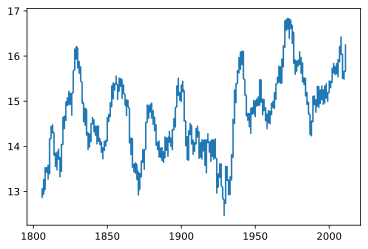

In [23]:
df = pd.DataFrame(data_sweden[mymask,3])
smoothed_data = df.rolling(200).mean()
plt.plot(data_sweden[mymask,0], smoothed_data.values);

We can also combine the two together

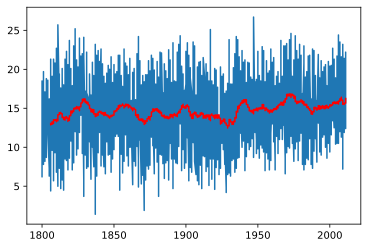

In [24]:
plt.plot(data_sweden[mymask,0],data_sweden[mymask,3])
plt.plot(data_sweden[mymask,0],smoothed_data.values,'r-');

Beyond the rolling mean, you can get the rolling median, min, max, ... Try to type pd.rolling, and see all possible suggestions

# Exercise (time series)
* Create a figure with 6 subplots in one column. Plot the mean temperature of every other month from 1800 to today. Use smoothing techniques if the data is too noisy. So one subplot would be for January, one for March, and so on.

TypeError: list.append() takes exactly one argument (2 given)

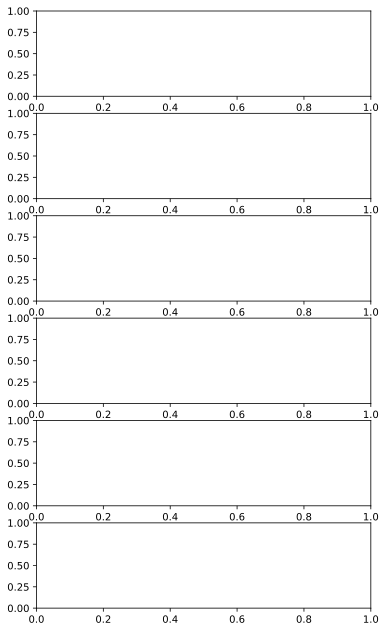

In [55]:
fig, ax = plt.subplots(6, figsize=(6,11))

df= pd.DataFrame()
for i in range(1,13,2):
    mymask = (data_sweden[:,1] == i) #I am creating a mask which takes only the data of one month
    np.mean(data_sweden[mymask,3])
for x in range(6):
    ax[x].plot(data_sweden[mymask,0],data_sweden[mymask,3])

In [ ]:
df = pd.DataFrame(data_sweden[,3])
smoothed_data = df.rolling(200).mean()
plt.plot(data_sweden[mymask,0], smoothed_data.values);

In [ ]:
plt.plot(data_sweden[mymask,0],data_sweden[mymask,3])
plt.plot(data_sweden[mymask,0],smoothed_data.values,'r-')
plt.plot(data_sweden[mymask,0],data)

# Exercise (distributions)
* Show the distribution of temperature in December in the entire dataset with a histogram
* Compare the distribution of temperatures in each month with boxplots (one boxplot for each month)
* Compare the distribution of temperatures every 50 years with box plots and violin plots

As usual, remember to apply the good principles of data visualization.

In [58]:
mymask = (data_sweden[:,1] == 12)
dec=data_sweden[mymask,3]

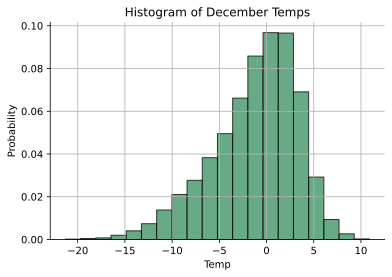

In [60]:
fig, ax = plt.subplots(1, 1)

# the histogram of the data
n, bins, patches = plt.hist(dec, 20, density=True, facecolor='#368d5c', alpha=0.75, edgecolor='k')

plt.xlabel('Temp')
plt.ylabel('Probability(T)')
plt.title(r'Histogram of December Temps')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'boxplot'

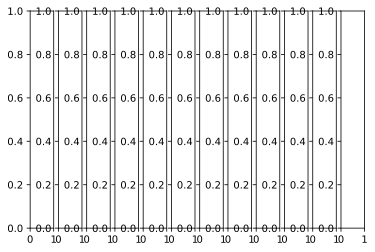

In [61]:
fig, ax = plt.subplots(1, 12)
ax.boxplot([A1, dec]);
plt.setp(ax, xticklabels=['A1', 'A2'])